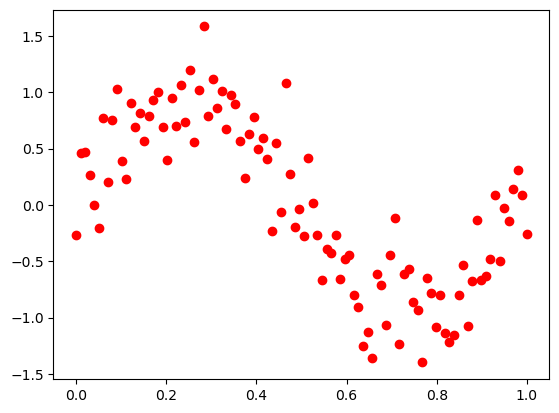

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def model_func(x):
    return np.sin(2 * np.pi * x) + np.random.normal(0, 0.3, size=len(x))

x_data = np.linspace(0, 1, 100)
y_data = model_func(x_data)
plt.scatter(x_data, y_data, label='Data', color='red')
plt.show()

[-107.61698837   -1.72435416  108.48561845]
[-112.18430211   -2.11717009    0.39281595  113.11774021]
[-115.93239196   11.25084509  -33.19571983   22.39235717  115.77991166]
[-118.36577917   10.26461067  -28.70546295   15.3843137     3.50402118
  118.26037814]


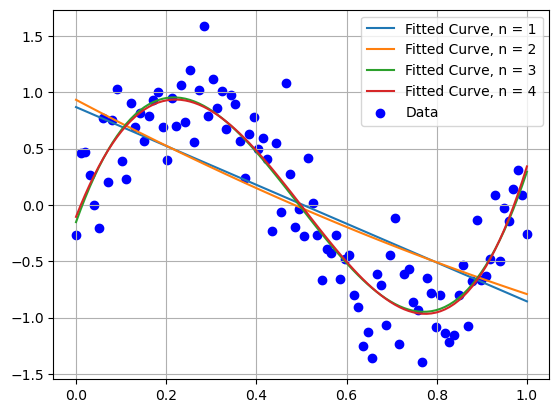

In [62]:
def fitting_func(x, a, b, n):
    X = []
    for i in range(n+1):
        X.append(x**i)
    X = np.array(X)
    return np.dot(a, X) + b

n = 5

for degree in range(1, n):
    popt, pcov = curve_fit(lambda x, *coeffs: fitting_func(x, coeffs[:-1], coeffs[-1], degree), 
                           x_data, y_data, p0=np.ones(degree+2))
    print(popt)
    y_fit = fitting_func(x_data, popt[:-1], popt[-1], degree)  
    plt.plot(x_data, y_fit, label=f'Fitted Curve, n = {degree}')
plt.scatter(x_data, y_data, label='Data', color='blue')
plt.legend()
plt.grid()
plt.show()

The fit of the plot get slighlty better. 

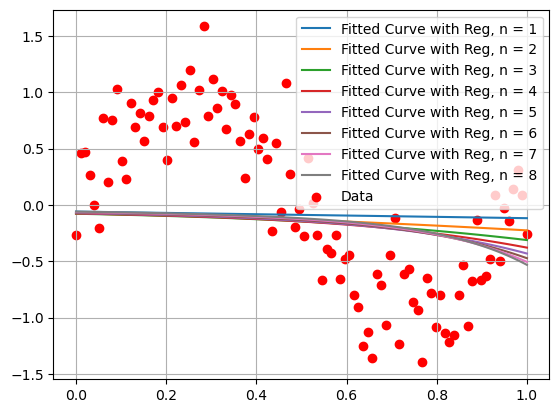

In [51]:
## adding regularization term
def fitting_func_reg(x, a, n, lam):
    X = 0 
    for i in range(n+1):
        X += x**i
    reg_term = lam/2 * np.sum(a**2)
    return a * X  + reg_term

n = 9

for i in range(1, n):
    lam = np.exp(-18)  # regularization parameter
    popt, pcov = curve_fit(lambda x, a: fitting_func_reg(x, a, i, lam), x_data, y_data)
    
    y_fit = fitting_func_reg(x_data, *popt, i, lam)  
    plt.plot(x_data, y_fit, label=f'Fitted Curve with Reg, n = {i}')

plt.scatter(x_data, y_data, label='Data', color='red')
plt.legend()
plt.grid()
plt.show()